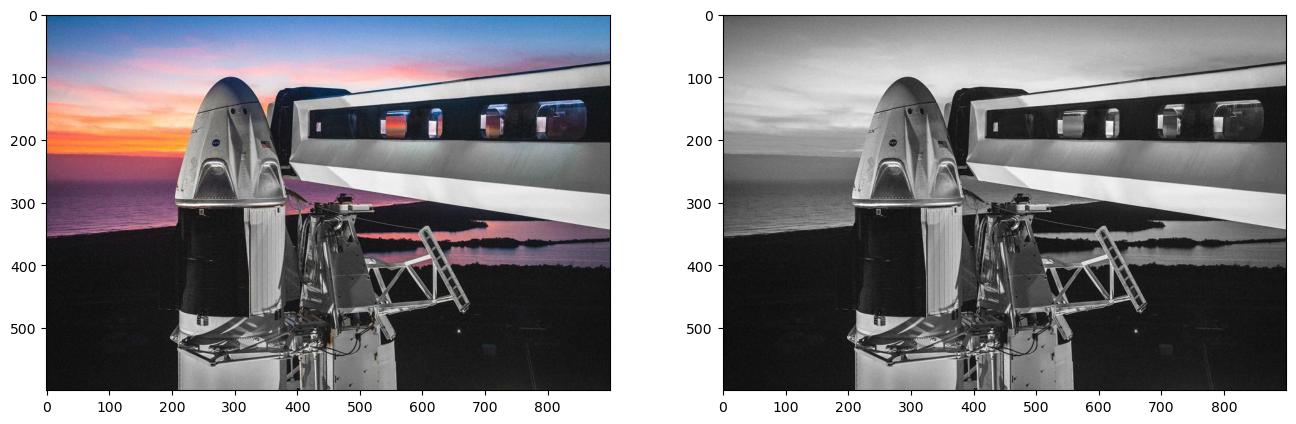

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Abre a imagem "foto.jpg" e a converte em um array NumPy representado como "foto_rgb"
foto_rgb = np.array(Image.open("foto.jpg"))[:, :, :3]
# Obtém as dimensões da imagem (linhas, colunas e canais de cores)
l, c, p = foto_rgb.shape
# Converte a imagem para escala de cinza
foto = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(foto_rgb[i, j, 0])  # Componente de cor vermelha
        g = float(foto_rgb[i, j, 1])  # Componente de cor verde
        b = float(foto_rgb[i, j, 2])  # Componente de cor azul
        
        # Calcula o valor médio das três componentes de cor e atribui a "foto"
        foto[i, j] = (r + g + b) / 3

# Cria uma figura do Matplotlib com dois subplots, configurando seu tamanho
plt.figure(figsize=(16, 16))

# Configura o primeiro subplot para exibir a imagem colorida original
plt.subplot(1, 2, 1)
plt.imshow(foto_rgb)

# Configura o segundo subplot para exibir a imagem em escala de cinza com um mapa de cores "gray"
plt.subplot(1, 2, 2)
plt.imshow(foto, cmap='gray')

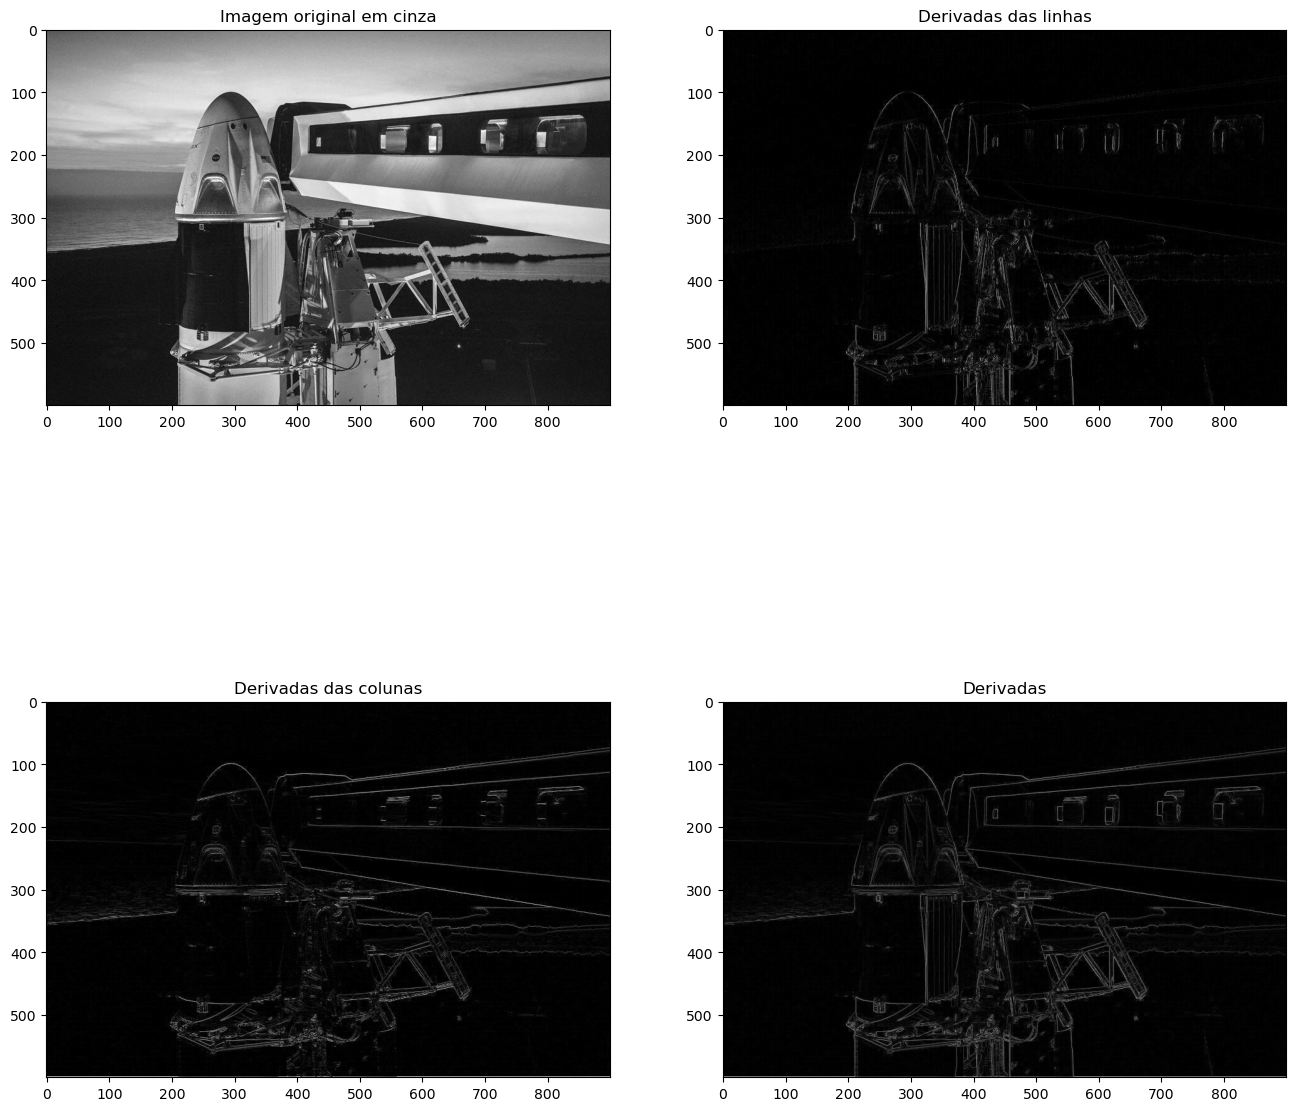

In [7]:
# Calcular a diferença absoluta entre os pixels nas colunas da imagem
abs_tg_c = np.abs(np.diff(foto.astype(np.float64), axis=0, append=255))

# Calcular a diferença absoluta entre os pixels nas linhas da imagem
abs_tg_l = np.abs(np.diff(foto.astype(np.float64), axis=1, append=255))

# Calcular a magnitude do gradiente combinando as diferenças nas colunas e nas linhas
abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

# Definir um valor de limite (threshold)
threshold = 16

# Criar uma imagem vazia para armazenar as bordas
foto_border = np.zeros(shape=(l, c), dtype=np.uint8)

# Definir os pixels como brancos (255) onde a magnitude do gradiente é maior que o limite
foto_border[abs_tg > threshold] = 255

# Criar uma figura do Matplotlib com quatro subplots
plt.figure(figsize=(16, 16))

# Configurar e exibir a imagem original em escala de cinza
plt.subplot(2, 2, 1)
plt.title("Imagem original em cinza")
plt.imshow(foto, cmap='gray')

# Configurar e exibir as derivadas das linhas
plt.subplot(2, 2, 2)
plt.title("Derivadas das linhas")
plt.imshow(abs_tg_l, cmap='gray')

# Configurar e exibir as derivadas das colunas
plt.subplot(2, 2, 3)
plt.title("Derivadas das colunas")
plt.imshow(abs_tg_c, cmap='gray')

# Configurar e exibir a magnitude do gradiente (bordas)
plt.subplot(2, 2, 4)
plt.title("Derivadas")
plt.imshow(abs_tg, cmap='gray')

(600, 900)


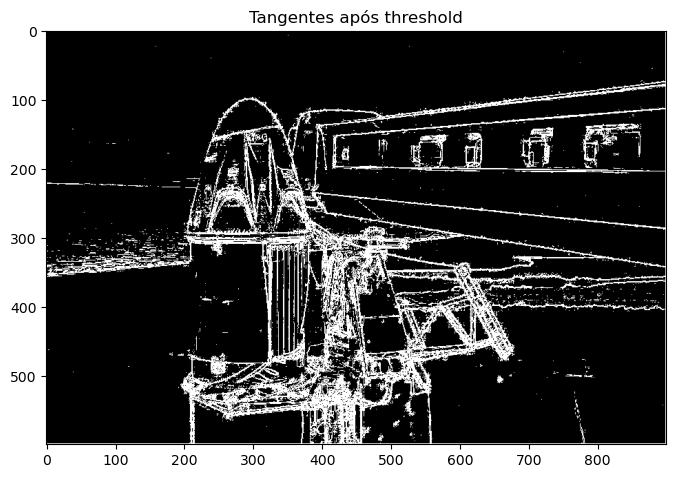

In [8]:
# Criar uma figura do Matplotlib com tamanho de 8x8 polegadas
plt.figure(figsize=(8, 8))

# Definir o título da figura
plt.title("Tangentes após threshold")

# Exibir a imagem de borda após aplicar o threshold, usando um mapa de cores em escala de cinza
plt.imshow(foto_border, cmap='gray')

# Imprimir as dimensões da imagem de borda
print(foto_border.shape)

In [14]:
#Salvar a imagem em escala de cinza
Image.fromarray(foto).save('cinza.jpg')
# Salvar a imagem de borda
Image.fromarray(foto_border).save("imagem_borda.jpg")